In [344]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model

In [345]:
#Polynomial regression, revisited
#We build on the material from Week 3, where we wrote the function to produce an DataFrame with columns containing the powers of a given input. 
#Copy and paste the function polynomial_dataframe from Week 3:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power) #Result will be wrong if we use np.power(feature, power)
    return poly_dataframe

In [346]:
np.power(430, 10)#The result is not right. You can tell that np.power is making a mistake here. See below for solution

688938277411177472

In [347]:
np.exp(np.log(430)*10) # This will reolve the issue and the result as below is right.

2.1611482313284229e+26

In [348]:
430**10

216114823132842490000000000

In [349]:
#Let's use matplotlib to visualize what a polynomial regression looks like on the house data.
import matplotlib.pyplot as plt
%matplotlib inline

In [350]:
sales = pd.read_csv('kc_house_data.csv')
sales.sort_values(['sqft_living', 'price'])[:5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


In [351]:
sales['sqft_living'].head()

0    1180
1    2570
2     770
3    1960
4    1680
Name: sqft_living, dtype: int64

In [352]:
#What does the return of function polynomial_Datafram look like?
poly15_dataframe = polynomial_dataframe(sales['sqft_living'], 15)
poly15_dataframe.sort_values(['power_1']).head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
19452,290,84100,24389000,7072810000,2051114900000,594823321000000,172498763090000000,50024641296100000000,14507145975869000000000,4207072333002010000000000,1220050976570582900000000000,353814783205469041000000000000,102606287129586021890000000000000,29755823267579946348100000000000000,8629188747598184440949000000000000000
15381,370,136900,50653000,18741610000,6934395700000,2565726409000000,949318771330000000,351247945392100000000,129961739795077000000000,48085843724178490000000000,17791762177946041300000000000,6582952005840035281000000000000,2435692242160813053970000000000000,901206129599500829968900000000000000,333446267951815307088493000000000000000
860,380,144400,54872000,20851360000,7923516800000,3010936384000000,1144155825920000000,434779213849600000000,165216101262848000000000,62782118479882240000000000,23857205022355251200000000000,9065737908494995456000000000000,3444980405228098273280000000000000,1309092553986677343846400000000000000,497455170514937390661632000000000000000
18379,384,147456,56623104,21743271936,8349416423424,3206175906594816,1231171548132409344,472769874482845188096,181543631801412552228864,69712754611742420055883776,26769697770909089301459369984,10279563944029090291760398073856,3947352554507170672035992860360704,1515783380930753538061821258378510336,582060818277409358615739363217347969024
4868,390,152100,59319000,23134410000,9022419900000,3518743761000000,1372310066790000000,535200926048100000000,208728361158759000000000,81404060851916010000000000,31747583732247243900000000000,12381557655576425121000000000000,4828807485674805797190000000000000,1883234919413174260904100000000000000,734461618571137961752599000000000000000


In [353]:
#As in Week 3, we will use the sqft_living variable. 
#For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.
sales = sales.sort_values(['sqft_living', 'price'])
sales[:2]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000


In [354]:
#Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using polynomial_dataframe() and fit a model with these features. 
#When fitting the model, use an L2 penalty of 1.5e-5:
l2_small_penalty = 1.5e-5

In [355]:
#With the L2 penalty specified above, write a function to fit the model and print out the learned weights.
def polynomial_ridge_regression(data, deg, output, l2_penalty):
    poly_dataframe = polynomial_dataframe(data['sqft_living'], deg)
    my_features = poly_dataframe.columns.values.tolist()
    poly_dataframe[output] = data[output]
    reg = linear_model.Ridge (alpha = l2_penalty, normalize=True)
    return reg.fit(poly_dataframe[my_features], poly_dataframe[output])

In [356]:
model = polynomial_ridge_regression(sales, 15, 'price', 1e-5)

QUIZ QUESTION: What's the learned value for the coefficient of feature power_1(using ridge regressin)?

In [358]:
#QUIZ QUESTION: What's the learned value for the coefficient of feature power_1(using ridge regressin)?
model1.coef_ 

array([ 280.61935861])

In [360]:
#What's the learned value for the coefficient of feature power_1 using linear regression?
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
poly1_dataframe = polynomial_dataframe(sales['sqft_living'], 1)
poly1_dataframe['price'] = sales['price']
poly1_dataframe.head()
model1_linear = LinearRegression()
model1_linear.fit(poly1_dataframe['power_1'].values.reshape(-1,1), poly1_dataframe['price'].values.reshape(-1,1))
print (model1_linear.intercept_, model1_linear.coef_)

[-43580.74309447] [[ 280.6235679]]


# Observe overfitting

Recall from Week 3 that the polynomial fit of degree 15 changed wildly whenever the data changed. 
In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Week 3.

In [361]:
#First load 4 sets of data
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

In [362]:
def plot_poly_predictions(data, model):
    poly_dataframe = polynomial_dataframe(data['sqft_living'], 15)
    plt.plot(poly_dataframe['power_1'],data['price'],'.',
        poly_dataframe['power_1'], model.predict(poly_dataframe),'-')

Next, fit a 15th degree polynomial on set_1, set_2, set_3, and set_4, using 'sqft_living' to predict prices. 
Print the weights and make a plot of the resulting model.
Hint: When calling linear_regression, use the same L2 penalty as before (i.e. l2_small_penalty). 


In [363]:
model_set1 = polynomial_ridge_regression(set_1, 15, 'price', 1e-9)
print('intercept of model 1: ',model_set1.intercept_ )
print('coefficients of model 1: ',model_set1.coef_ )

intercept of model 1:  23888.8254131
coefficients of model 1:  [  5.44669398e+02  -3.55447604e-01   1.22446380e-04  -1.17175310e-08
  -3.90512522e-13  -1.39076366e-17   1.47860335e-20   6.87491441e-25
  -7.57203942e-29  -1.04097300e-32  -3.71844086e-37   3.39989297e-41
   5.56592048e-45   2.53761314e-49  -3.35152884e-53]


In [364]:
set_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
1,1352300580,20141114T000000,247000.0,1,1.00,460,4120,1.0,0,0,...,4,460,0,1937,0,98055,47.4868,-122.199,990,4120
2,1320069249,20141020T000000,192500.0,1,1.00,470,63737,1.0,0,2,...,5,470,0,1924,0,98022,47.2163,-121.984,1350,46762
3,1437500015,20140709T000000,150000.0,3,0.75,490,38500,1.5,0,0,...,5,490,0,1959,0,98014,47.7112,-121.315,800,18297
4,859000110,20141002T000000,125000.0,1,1.00,500,7440,1.0,0,0,...,5,500,0,1928,0,98106,47.5252,-122.362,1350,7440


intercept of model 1:  23888.8254131
coefficients of model 1:  [  5.44669398e+02  -3.55447604e-01   1.22446380e-04  -1.17175310e-08
  -3.90512522e-13  -1.39076366e-17   1.47860335e-20   6.87491441e-25
  -7.57203942e-29  -1.04097300e-32  -3.71844086e-37   3.39989297e-41
   5.56592048e-45   2.53761314e-49  -3.35152884e-53]


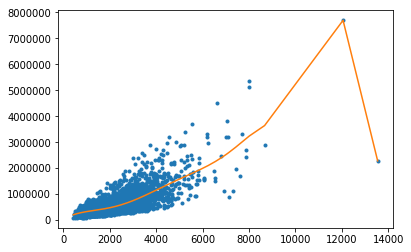

In [368]:
# Fit a model using set_1 with degree 15 and l2 norm penalty 1e-9
# Call function polynomial_ridge_regression
model1 = polynomial_ridge_regression(set_1, 15, 'price', 1e-9)
print('intercept of model 1: ',model1.intercept_ )
print('coefficients of model 1: ',model1.coef_ )
plot_poly_predictions(set_1, model1)

In [365]:
# Fit a model using set_1 with degree 15 and l2 norm penalty 1e-9
# not using function polynomial_ridge_regression
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
poly15_dataframe = polynomial_dataframe(set_1['sqft_living'], 15)
my_features = poly15_dataframe.columns.values.tolist()
poly15_dataframe['price'] = set_1['price']
model15_set1 = linear_model.Ridge (alpha = 1e-9, normalize=True)
model15_set1.fit(poly15_dataframe[my_features], poly15_dataframe['price'])
print('intercept of model 15: ',model15_set1.intercept_ )
print('coefficients of model 15: ',model15_set1.coef_ )

intercept of model 15:  23888.8254131
coefficients of model 15:  [  5.44669398e+02  -3.55447604e-01   1.22446380e-04  -1.17175310e-08
  -3.90512522e-13  -1.39076366e-17   1.47860335e-20   6.87491441e-25
  -7.57203942e-29  -1.04097300e-32  -3.71844086e-37   3.39989297e-41
   5.56592048e-45   2.53761314e-49  -3.35152884e-53]


intercept of model 2:  -55614.6412349
coefficients of model 2:  [  8.59362655e+02  -8.18118292e-01   4.28879999e-04  -9.12770756e-08
  -2.69604101e-12   3.73980256e-15  -1.42711872e-19  -6.30794680e-23
  -1.44559567e-27   7.44321221e-31   9.25865891e-35   3.28016689e-41
  -1.29543500e-42  -1.38781268e-46   1.66546448e-50]


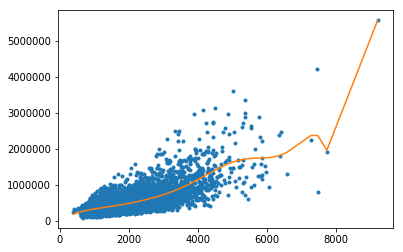

In [369]:
# Fit a model using set_2 with degree 15 and l2 norm penalty 1e-9
# Call function polynomial_ridge_regression
model2 = polynomial_ridge_regression(set_2, 15, 'price', 1e-9)
print('intercept of model 2: ',model2.intercept_ )
print('coefficients of model 2: ',model2.coef_ )
plot_poly_predictions(set_2, model2)

intercept of model 3:  470987.869598
coefficients of model 3:  [ -7.55395955e+02   9.75579541e-01  -4.58946016e-04   7.77958186e-08
   7.15013167e-12  -2.88601961e-15  -2.13678061e-20   3.38085232e-23
   2.19178154e-27  -1.97067760e-31  -4.15993149e-35  -1.80196149e-39
   3.19071102e-43   5.08456936e-47  -3.93304260e-51]


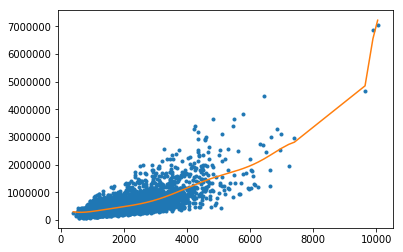

In [370]:
# Fit a model using set_3 with degree 15 and l2 norm penalty 1e-9
# Call function polynomial_ridge_regression
model3 = polynomial_ridge_regression(set_3, 15, 'price', 1e-9)
print('intercept of model 3: ',model3.intercept_ )
print('coefficients of model 3: ',model3.coef_ )
plot_poly_predictions(set_3, model3)

intercept of model 4:  -145655.606028
coefficients of model 4:  [  1.11944566e+03  -9.83760136e-01   3.38770838e-04   3.60377452e-08
  -4.37814067e-11   5.77191707e-15   7.66795353e-19  -9.49297932e-23
  -1.96030803e-26  -2.10879295e-32   3.31005033e-34   3.47733885e-38
  -2.43039222e-42  -8.79553346e-46   6.44569709e-50]


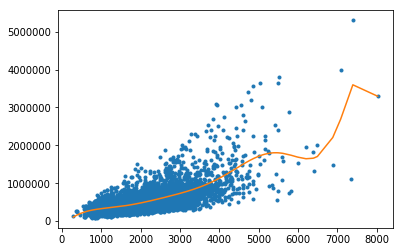

In [371]:
# Fit a model using set_4 with degree 15 and l2 norm penalty 1e-9
# Call function polynomial_ridge_regression
model4 = polynomial_ridge_regression(set_4, 15, 'price', 1e-9)
print('intercept of model 4: ',model4.intercept_ )
print('coefficients of model 4: ',model4.coef_ )
plot_poly_predictions(set_4, model4)

The four curves should differ from one another a lot, as should the coefficients you learned.

8 Quiz Question: For the models learned in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1? (For the purpose of answering this question, negative numbers are considered "smaller" than positive numbers. So -5 is smaller than -3, and -3 is smaller than 5 and so forth.)

In [377]:
8.59362655e+02-1.11944566e+03
#the largest coefficient of power_1: 1.11944566e+03
#the smallest coefficient of power_1: -7.55395955e+02

-260.08300500000007

In [520]:
1.11944566e+03

1119.44566

# Ridge regression comes to rescue

9 Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (The weights looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)

l2_large_penalty=1.23e2

intercept of model 1_2:  539103.031058
coefficients of model 1_2:  [  2.32806803e+00   3.53621608e-04   3.31969692e-08   2.00082477e-12
   1.11492559e-16   6.57786122e-21   4.12939525e-25   2.70393755e-29
   1.81614763e-33   1.23824277e-37   8.51872481e-42   5.89455598e-46
   4.09542560e-50   2.85464889e-54   1.99547476e-58]


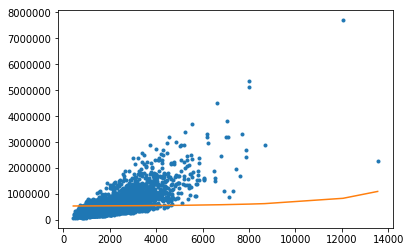

In [379]:
# Fit a model using set_1 with degree 15 and l2 norm penalty 1.23e2
# Call function polynomial_ridge_regression
model1_2 = polynomial_ridge_regression(set_1, 15, 'price', 1.23e2)
print('intercept of model 1_2: ',model1_2.intercept_ )
print('coefficients of model 1_2: ',model1_2.coef_ )
plot_poly_predictions(set_1, model1_2)

intercept of model 2_2:  529853.025358
coefficients of model 2_2:  [  2.09756903e+00   3.90817483e-04   6.67189944e-08   8.90002997e-12
   9.72639877e-16   9.69733682e-20   9.50564475e-24   9.44491031e-28
   9.57191338e-32   9.86945155e-36   1.03101115e-39   1.08729784e-43
   1.15453748e-47   1.23211305e-51   1.31986696e-55]


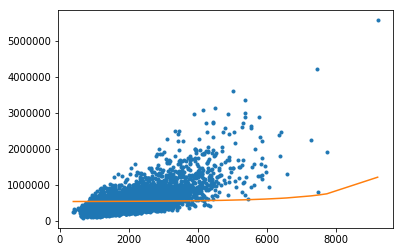

In [380]:
# Fit a model using set_2 with degree 15 and l2 norm penalty 1.23e2
# Call function polynomial_ridge_regression
model2_2 = polynomial_ridge_regression(set_2, 15, 'price', 1.23e2)
print('intercept of model 2_2: ',model2_2.intercept_ )
print('coefficients of model 2_2: ',model2_2.coef_ )
plot_poly_predictions(set_2, model2_2)

intercept of model 3_2:  533640.114097
coefficients of model 3_2:  [  2.28906258e+00   4.12472190e-04   6.08835345e-08   6.58572163e-12
   6.15278155e-16   5.64446634e-20   5.28834396e-24   5.07091402e-28
   4.94657273e-32   4.88043809e-36   4.85009106e-40   4.84161534e-44
   4.84635021e-48   4.85883628e-52   4.87558469e-56]


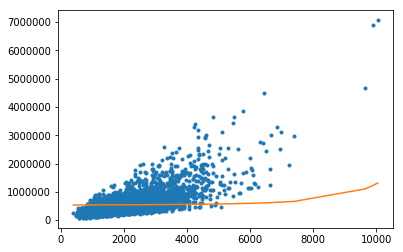

In [381]:
# Fit a model using set_3 with degree 15 and l2 norm penalty 1.23e2
# Call function polynomial_ridge_regression
model3_2 = polynomial_ridge_regression(set_3, 15, 'price', 1.23e2)
print('intercept of model 3_2: ',model3_2.intercept_ )
print('coefficients of model 3_2: ',model3_2.coef_ )
plot_poly_predictions(set_3, model3_2)

intercept of model 4_2:  524562.969047
coefficients of model 4_2:  [  2.08596194e+00   4.05035772e-04   7.46864647e-08   1.13096608e-11
   1.45864442e-15   1.73561251e-19   2.01609632e-23   2.34605255e-27
   2.75636073e-31   3.27043069e-35   3.91046855e-39   4.70118041e-43
   5.67212304e-47   6.85958087e-51   8.30843630e-55]


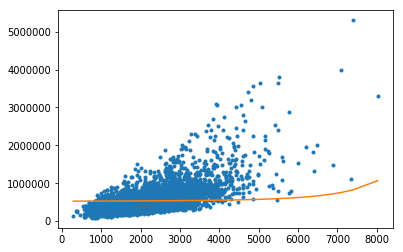

In [382]:
# Fit a model using set_4 with degree 15 and l2 norm penalty 1.23e2
# Call function polynomial_ridge_regression
model4_2 = polynomial_ridge_regression(set_4, 15, 'price', 1.23e2)
print('intercept of model 4_2: ',model4_2.intercept_ )
print('coefficients of model 4_2: ',model4_2.coef_ )
plot_poly_predictions(set_4, model4_2)

These curves should vary a lot less, now that you applied a high degree of regularization.

***QUIZ QUESTION:  For the models learned with the high level of regularization in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature `power_1`?*** (For the purpose of answering this question, negative numbers are considered "smaller" than positive numbers. So -5 is smaller than -3, and -3 is smaller than 5 and so forth.)

In [383]:
#the smallest values I learned for the coefficient of feature power_1
2.08596194e+00

#the largest values I learned for the coefficient of feature power_1
2.32806803e+00


2.32806803

# Selecting an L2 penalty via cross-validation

12.. Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called k-fold cross-validation. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
...
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that all observations are used for both training and validation, as we iterate over segments of data.

13.. To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. We reserve 10% of the data as the test set and randomly shuffle the remainder. Le'ts call the shuffled data 'train_valid_shuffled'.

For the purpose of this assignment, let us download the csv file containing pre-shuffled rows of training and validation sets combined:

In practice, you would shuffle the rows with a dynamically determined random seed.

In [510]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv')
test = pd.read_csv('wk3_kc_house_test_data.csv')

14.. Divide the combined training and validation set into equal segments. Each segment should receive n/k elements, where n is the number of observations in the training set and k is the number of segments. Since the segment 0 starts at index 0 and contains n/k elements, it ends at index (n/k)-1. The segment 1 starts where the segment 0 left off, at index (n/k). With n/k elements, the segment 1 ends at index (n*2/k)-1. Continuing in this fashion, we deduce that the segment i starts at index (n*i/k) and ends at (n*(i+1)/k)-1.

With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment, just to make sure you are getting the splits right.

In [410]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print (i, (start, end))

0 (0.0, 1938.6)
1 (1939.6, 3878.2)
2 (3879.2, 5817.8)
3 (5818.8, 7757.4)
4 (7758.4, 9697.0)
5 (9698.0, 11636.6)
6 (11637.6, 13576.2)
7 (13577.2, 15515.8)
8 (15516.8, 17455.4)
9 (17456.4, 19395.0)


Let us familiarize ourselves with array slicing with Pandas. To extract a continuous slice from a DataFrame, use colon in square brackets. For instance, the following cell extracts rows 0 to 9 of train_valid_shuffled. Notice that the first index (0) is included in the slice but the last index (10) is omitted.

In [391]:
train_valid_shuffled[0:10] # select rows 0 to 9

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2780400035,20140505T000000,665000.0,4,2.50,2800,5900,1.0,0,0,...,8,1660,1140,1963,0,98115,47.6809,-122.286,2580,5900
1,1703050500,20150321T000000,645000.0,3,2.50,2490,5978,2.0,0,0,...,9,2490,0,2003,0,98074,47.6298,-122.022,2710,6629
2,5700002325,20140605T000000,640000.0,3,1.75,2340,4206,1.0,0,0,...,7,1170,1170,1917,0,98144,47.5759,-122.288,1360,4725
3,475000510,20141118T000000,594000.0,3,1.00,1320,5000,1.0,0,0,...,7,1090,230,1920,0,98107,47.6674,-122.365,1700,5000
4,844001052,20150128T000000,365000.0,4,2.50,1904,8200,2.0,0,0,...,7,1904,0,1999,0,98010,47.3107,-122.001,1560,12426
5,2781280290,20150427T000000,305000.0,3,2.50,1610,3516,2.0,0,0,...,8,1610,0,2006,0,98055,47.4491,-122.188,1610,3056
6,2214800630,20141105T000000,239950.0,3,2.25,1560,8280,2.0,0,0,...,7,1560,0,1979,0,98001,47.3393,-122.259,1920,8120
7,2114700540,20141021T000000,366000.0,3,2.50,1320,4320,1.0,0,0,...,6,660,660,1918,0,98106,47.5327,-122.347,1190,4200
8,2596400050,20140730T000000,375000.0,3,1.00,1960,7955,1.0,0,0,...,7,1260,700,1963,0,98177,47.7641,-122.364,1850,8219
9,4140900050,20150126T000000,440000.0,4,1.75,2180,10200,1.0,0,2,...,8,2000,180,1966,0,98028,47.7638,-122.270,2590,10445


If the observations are grouped into 10 segments, the segment i is given by

In [ ]:
start = int((n*i)/10)
end = int((n*(i+1))/10)
train_valid_shuffled[start:end+1]

In [402]:
len(train_valid_shuffled)

19396

Now let us extract individual segments with array slicing. Consider the scenario where we group the houses in the train_valid_shuffled dataframe into k=10 segments of roughly equal size, with starting and ending indices computed as above. Extract the fourth segment (segment 3) and assign it to a variable called validation4.

In [414]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation
i=3
start = int((n*i)/10)
end = int((n*(i+1))/10)
validation4 = train_valid_shuffled[start:end+1]
validation4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5818,3342102880,20140811T000000,464000.0,3,2.50,2460,5400,1.0,0,0,...,8,1520,940,2001,0,98056,47.5231,-122.202,1745,5400
5819,5113400364,20150126T000000,650000.0,4,1.50,2480,6383,1.0,0,0,...,7,1380,1100,1946,0,98119,47.6445,-122.374,1440,6000
5820,984210170,20150326T000000,256500.0,5,2.50,1960,7350,1.0,0,0,...,7,1360,600,1969,0,98058,47.4368,-122.165,1900,7350
5821,6117501755,20141230T000000,355000.0,4,1.50,2230,11536,1.0,0,1,...,7,1220,1010,1954,0,98166,47.4409,-122.348,2170,12465
5822,4307300520,20150423T000000,359000.0,4,2.50,2160,4500,2.0,0,0,...,7,2160,0,2002,0,98056,47.4819,-122.182,2160,4496
5823,2205700345,20140707T000000,500000.0,4,2.00,1700,8640,1.0,0,0,...,7,850,850,1955,2010,98006,47.5774,-122.153,1620,9000
5824,2518400046,20141118T000000,456700.0,3,1.75,2820,8879,1.0,0,0,...,7,1540,1280,1920,1957,98146,47.5094,-122.376,1640,7850
5825,4037000925,20150327T000000,650000.0,5,2.25,2400,13450,1.0,0,0,...,7,1200,1200,1957,0,98008,47.6007,-122.117,1950,10361
5826,6400700389,20140710T000000,875000.0,5,3.00,2960,15152,2.0,0,0,...,9,2960,0,2004,0,98033,47.6689,-122.179,1850,9453
5827,1422200090,20140915T000000,676500.0,3,1.75,1300,2446,1.0,0,3,...,8,880,420,1961,0,98122,47.6071,-122.285,2440,5051


To verify that we have the right elements extracted, run the following cell, which computes the average price of the fourth segment. When rounded to nearest whole number, the average should be $536,234.

In [407]:
print (int(round(validation4['price'].mean(), 0)))

536159


After designating one of the k segments as the validation set, we train a model using the rest of the data.

Meanwhile, to choose the remainder of the data that's not part of the segment i, we select two slices (0:start) and (end+1:n) and paste them together.

In [ ]:
train_valid_shuffled[0:start].append(train_valid_shuffled[end+1:n])

15.. Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) k, (ii) l2_penalty, (iii) dataframe containing input features (e.g. poly15_data) and (iv) column of output values (e.g. price). The function returns the average validation error using k segments as validation sets. We shall assume that the input dataframe does not contain the output column.

For each i in [0, 1, ... k-1]:

Compute starting and ending indices of segment i and call 'start' and 'end'
Form validation set by taking a slice (start:end+1) from the data.
Form training set by appending slice (end+1:n) to the end of slice (0:start).
Train a linear model using training set just formed, with a given l2_penalty
Compute validation error (RSS) using validation set just formed
e.g. in Python:

In [479]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    RSS_all = []
    for i in range(k):
        #identify train data and valid data
        n = len(data)
        start = int((n*i)/k)
        end = int((n*(i+1))/k)
        train_data = data[0:start].append(data[end+1:n])
        valid_data = data[start:end+1]
        poly_dataframe_train = polynomial_dataframe(train_data['sqft_living'], 15)
        my_features_train = poly_dataframe_train.columns.values.tolist()
        poly_dataframe_train[output] = train_data[output]
        #fit model
        reg = linear_model.Ridge (alpha = l2_penalty, normalize=True)
        model = reg.fit(poly_dataframe_train[my_features_train], poly_dataframe_train[output])
        #get the predictions of valid data
        poly_dataframe_valid = polynomial_dataframe(valid_data['sqft_living'], 15)
        predictions_valid = model.predict(poly_dataframe_valid)
        outcomes_valid = valid_data[output]
        #calculate residuals of predictions based on valid data
        residuals_valid = predictions_valid - outcomes_valid
        #calculate RSS of the predictions
        RSS_valid = (residuals_valid * residuals_valid).sum()
        RSS_all.append(RSS_valid)
    #print("RSS_all",RSS_all)
    RSS_avg = sum(RSS_all)/len(RSS_all)
    #print("RSS_avg",RSS_avg)
    return RSS_avg

In [480]:
k_fold_cross_validation(10, 10, train_valid_shuffled, 'price')

223727424739194.31

16.. Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:

We will again be aiming to fit a 15th-order polynomial model using the sqft_living input
For each l2_penalty in [10^3, 10^3.5, 10^4, 10^4.5, ..., 10^9] (to get this in Python, you can use this Numpy function: np.logspace(3, 9, num=13).): Run 10-fold cross-validation with l2_penalty.
Report which L2 penalty produced the lowest average validation error.
Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop. Make sure to use train_valid_shuffled when generating polynomial features!

17.. Quiz Question: What is the best value for the L2 penalty according to 10-fold validation?

In [470]:
for l2_penalty in np.logspace(3, 9, num=13):
    print(l2_penalty)

1000.0
3162.27766017
10000.0
31622.7766017
100000.0
316227.766017
1000000.0
3162277.66017
10000000.0
31622776.6017
100000000.0
316227766.017
1000000000.0


In [472]:
np.power(10,3.5)

3162.2776601683795

In [487]:
all_valid_RSS = []
all_l2 = []
for l2_penalty in np.logspace(3, 9, num=13):
    valid_RSS = k_fold_cross_validation(10, l2_penalty, train_valid_shuffled, 'price')
    all_valid_RSS.append(valid_RSS)
    all_l2.append(l2_penalty)
pd_all = pd.DataFrame(
{'RSS': all_valid_RSS,
'l2': all_l2,
})

In [488]:
pd_all

,RSS,l2
0,2.650179e+14,1.000000e+03
1,2.657335e+14,3.162278e+03
2,2.659649e+14,1.000000e+04
3,2.660387e+14,3.162278e+04
4,2.660620e+14,1.000000e+05
5,2.660694e+14,3.162278e+05
6,2.660718e+14,1.000000e+06
7,2.660725e+14,3.162278e+06
8,2.660727e+14,1.000000e+07
9,2.660728e+14,3.162278e+07


In [489]:
#find the miminum RSS and its l2 norm penalty
#Question: What is the best value for the L2 penalty according to 10-fold validation?
#Answer: 10^3
#Solution 1:
pd_all.sort_values(['RSS'])

,RSS,l2
0,2.650179e+14,1.000000e+03
1,2.657335e+14,3.162278e+03
2,2.659649e+14,1.000000e+04
3,2.660387e+14,3.162278e+04
4,2.660620e+14,1.000000e+05
5,2.660694e+14,3.162278e+05
6,2.660718e+14,1.000000e+06
7,2.660725e+14,3.162278e+06
8,2.660727e+14,1.000000e+07
9,2.660728e+14,3.162278e+07


In [500]:
#Solution 2

all_valid_RSS = []
for l2_penalty in np.logspace(3, 9, num=13):
    valid_RSS = k_fold_cross_validation(10, l2_penalty, train_valid_shuffled, 'price')
    print(valid_RSS,l2_penalty)
    all_valid_RSS.append(valid_RSS)
all_valid_RSS.index(min(all_valid_RSS))

2.65017874562e+14 1000.0
2.6573349394e+14 3162.27766017
2.65964941178e+14 10000.0
2.66038658207e+14 31622.7766017
2.66062022668e+14 100000.0
2.6606941648e+14 316227.766017
2.66071755142e+14 1000000.0
2.66072494744e+14 3162277.66017
2.66072728633e+14 10000000.0
2.66072802595e+14 31622776.6017
2.66072825984e+14 100000000.0
2.66072833381e+14 316227766.017
2.6607283572e+14 1000000000.0


0

19 Quiz Question: Using the best L2 penalty found above, train a model using all training data. What is the RSS on the TEST data of the model you learn with this L2 penalty?

In [525]:
#fit a model
model_alltrain = polynomial_ridge_regression(train_valid_shuffled, 15, 'price', 1000)
#identfy x of test data
poly_dataframe_test = polynomial_dataframe(test['sqft_living'], 15)
#get the predictions of test data
predictions_test = model_alltrain.predict(poly_dataframe_test)
outcomes_test = test['price']
#calculate the residuals of predictions based on test data
residuals_test = predictions_test - outcomes_test
#calculate RSS of the predictions
RSS_test = (residuals_test * residuals_test).sum()
print(RSS_test)

2.83856861224e+14
